<a href="https://colab.research.google.com/github/grace1996-beep/week-_4_ip_core/blob/main/week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing liblaries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

reading csv file

In [26]:
df=pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


DATA CLEANING

In [27]:
#Checking for null values
df.isnull().sum()
#no null values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#checking for duplicates
df.duplicated()
#no duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

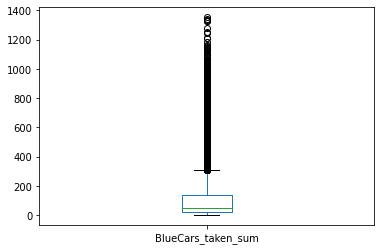

In [28]:
# Creating a box plot of the total number of bluecars taken sum
df.boxplot(column =['BlueCars_taken_sum'], grid = False) 

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
dfs = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
#printing the shape of the new datframe

print(dfs.shape)
#printing shape of the old datframe
print(df.shape)

(9783, 13)
(16085, 13)


In [30]:
dfs

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0


UNIVARIATE ANALYSIS

CATEGORICAL VARIABLES

In [31]:
#creating a frequency table to show  occurence of each category here am using "postal code"
freq_table=dfs.groupby(['dayOfWeek']).size().reset_index(name='Count').rename(columns={'day':'day'})
freq_table

,dayOfWeek,Count
0,0,1525
1,1,1520
2,2,1359
3,3,1133
4,4,1283
5,5,1399
6,6,1564


bar chart

In [32]:
import matplotlib.pyplot as plt


question?

 which days of the week  bluecars are largely taken?

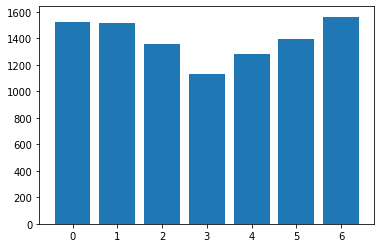

In [33]:
# bar charts are used to display value associated with categorical data
plt.bar(freq_table['dayOfWeek'],freq_table['Count'])
plt.show()

obhservations

wednesday seems to be the less active day for picking or returning cars

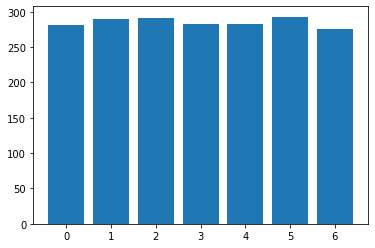

In [34]:
plt.bar(dfs['dayOfWeek'],dfs['BlueCars_taken_sum'])
plt.show()

observation

all days of the week seem convinient for picking blue cars

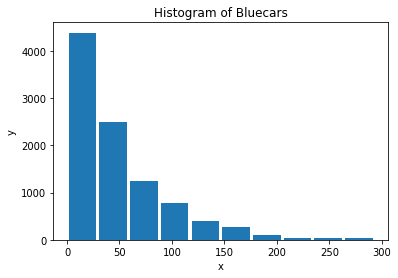

In [35]:
#histograms show distribution by grouping content
#checking Bluecars distribution
Bluecars = dfs['BlueCars_taken_sum']
bins            = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

plt.hist(Bluecars, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Bluecars') 
plt.show()

*observations*

most blue cars lie between 0 to 50

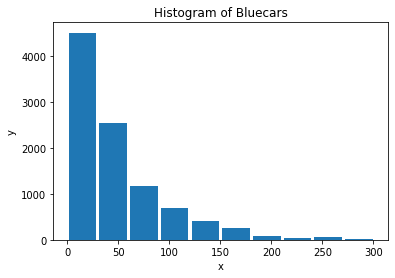

In [36]:
#histograms show distribution by grouping content
#checking Bluecars distribution
Bluecars = dfs['BlueCars_returned_sum']
bins            = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

plt.hist(Bluecars, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Bluecars') 
plt.show()

observations

measures of central tendancy

In [37]:
cs=dfs['BlueCars_taken_sum'].mean()
print(cs)
#median
cl=dfs['BlueCars_returned_sum'].mode()
print(cl)
cm=dfs['BlueCars_taken_sum'].median()
print(cm)


49.242870285188594
0    13
dtype: int64
34.0


In [38]:
std=dfs['BlueCars_taken_sum'].std()
std

46.303794622721085

In [39]:
var=dfs['BlueCars_returned_sum'].var()
var

2136.6431654408175

In [40]:
max_range = dfs["BlueCars_taken_sum"].max()
min_range= dfs["BlueCars_taken_sum"].min()

# Calculating the range
max_range- min_range

293

In [41]:
dfs["BlueCars_taken_sum"].quantile([0.25,0.5,0.75])

0.25    17.0
0.50    34.0
0.75    67.0
Name: BlueCars_taken_sum, dtype: float64

In [42]:
dfs["BlueCars_taken_sum"].kurt()


3.9107948136076676

In [43]:
dfs['BlueCars_taken_sum'].describe()

count    9783.000000
mean       49.242870
std        46.303795
min         0.000000
25%        17.000000
50%        34.000000
75%        67.000000
max       293.000000
Name: BlueCars_taken_sum, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


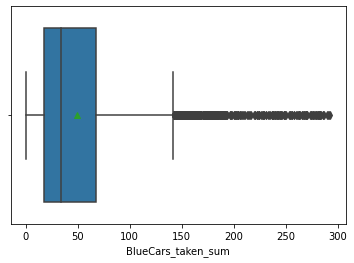

In [44]:
#boxplot of Respondent Age
sns.boxplot(dfs["BlueCars_taken_sum"], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


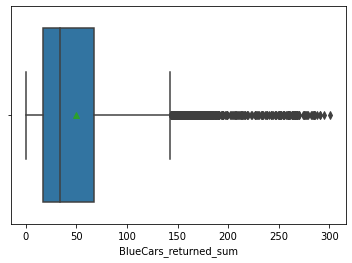

In [45]:
#box plot of household size
sns.boxplot(dfs["BlueCars_returned_sum"], showmeans=True)

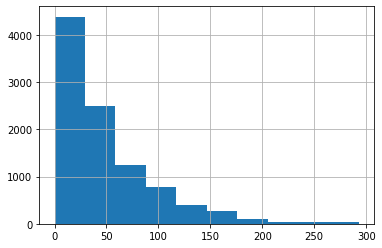

In [46]:
#creating a histogram
#question
#wgich age is more prone to having bank accounts?
dfs['BlueCars_taken_sum'].hist()

observations

most blue cars taken are beween number 0 to 50

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


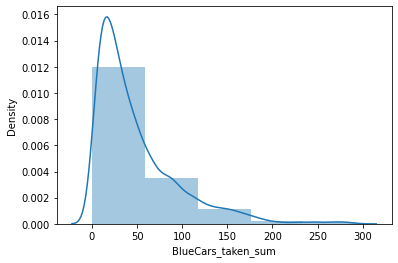

In [47]:
#plotting histograms
sns.distplot(dfs['BlueCars_taken_sum'],bins=5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


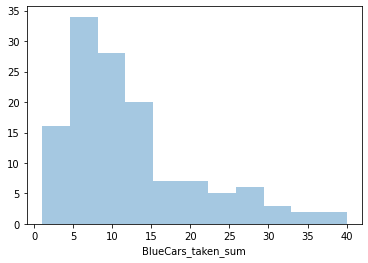

In [48]:
#bluecars taken plot
df = dfs.loc[dfs['Postal code'] ==91330]
sns.distplot(df['BlueCars_taken_sum'],  kde=False,label=91330)

BIVARIATE ANALYSIS

Numerical_Numerical Variable Analysis

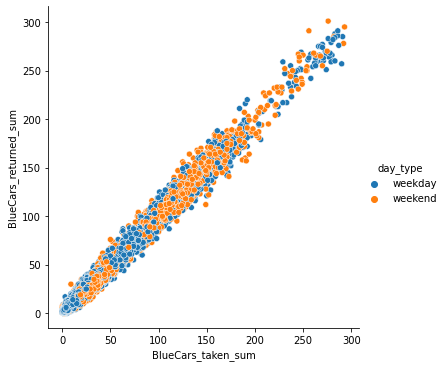

In [49]:
#this is the analysis betweeen relationshhip between two numerical values.
#scatter plot between two numerical values
sns.relplot(x='BlueCars_taken_sum',y='BlueCars_returned_sum',hue='day_type',data=dfs)

observations

most bluecars are taken during weekdays


bluecars are also taken uduring the weekend

theres a linear realtionship between the two samples

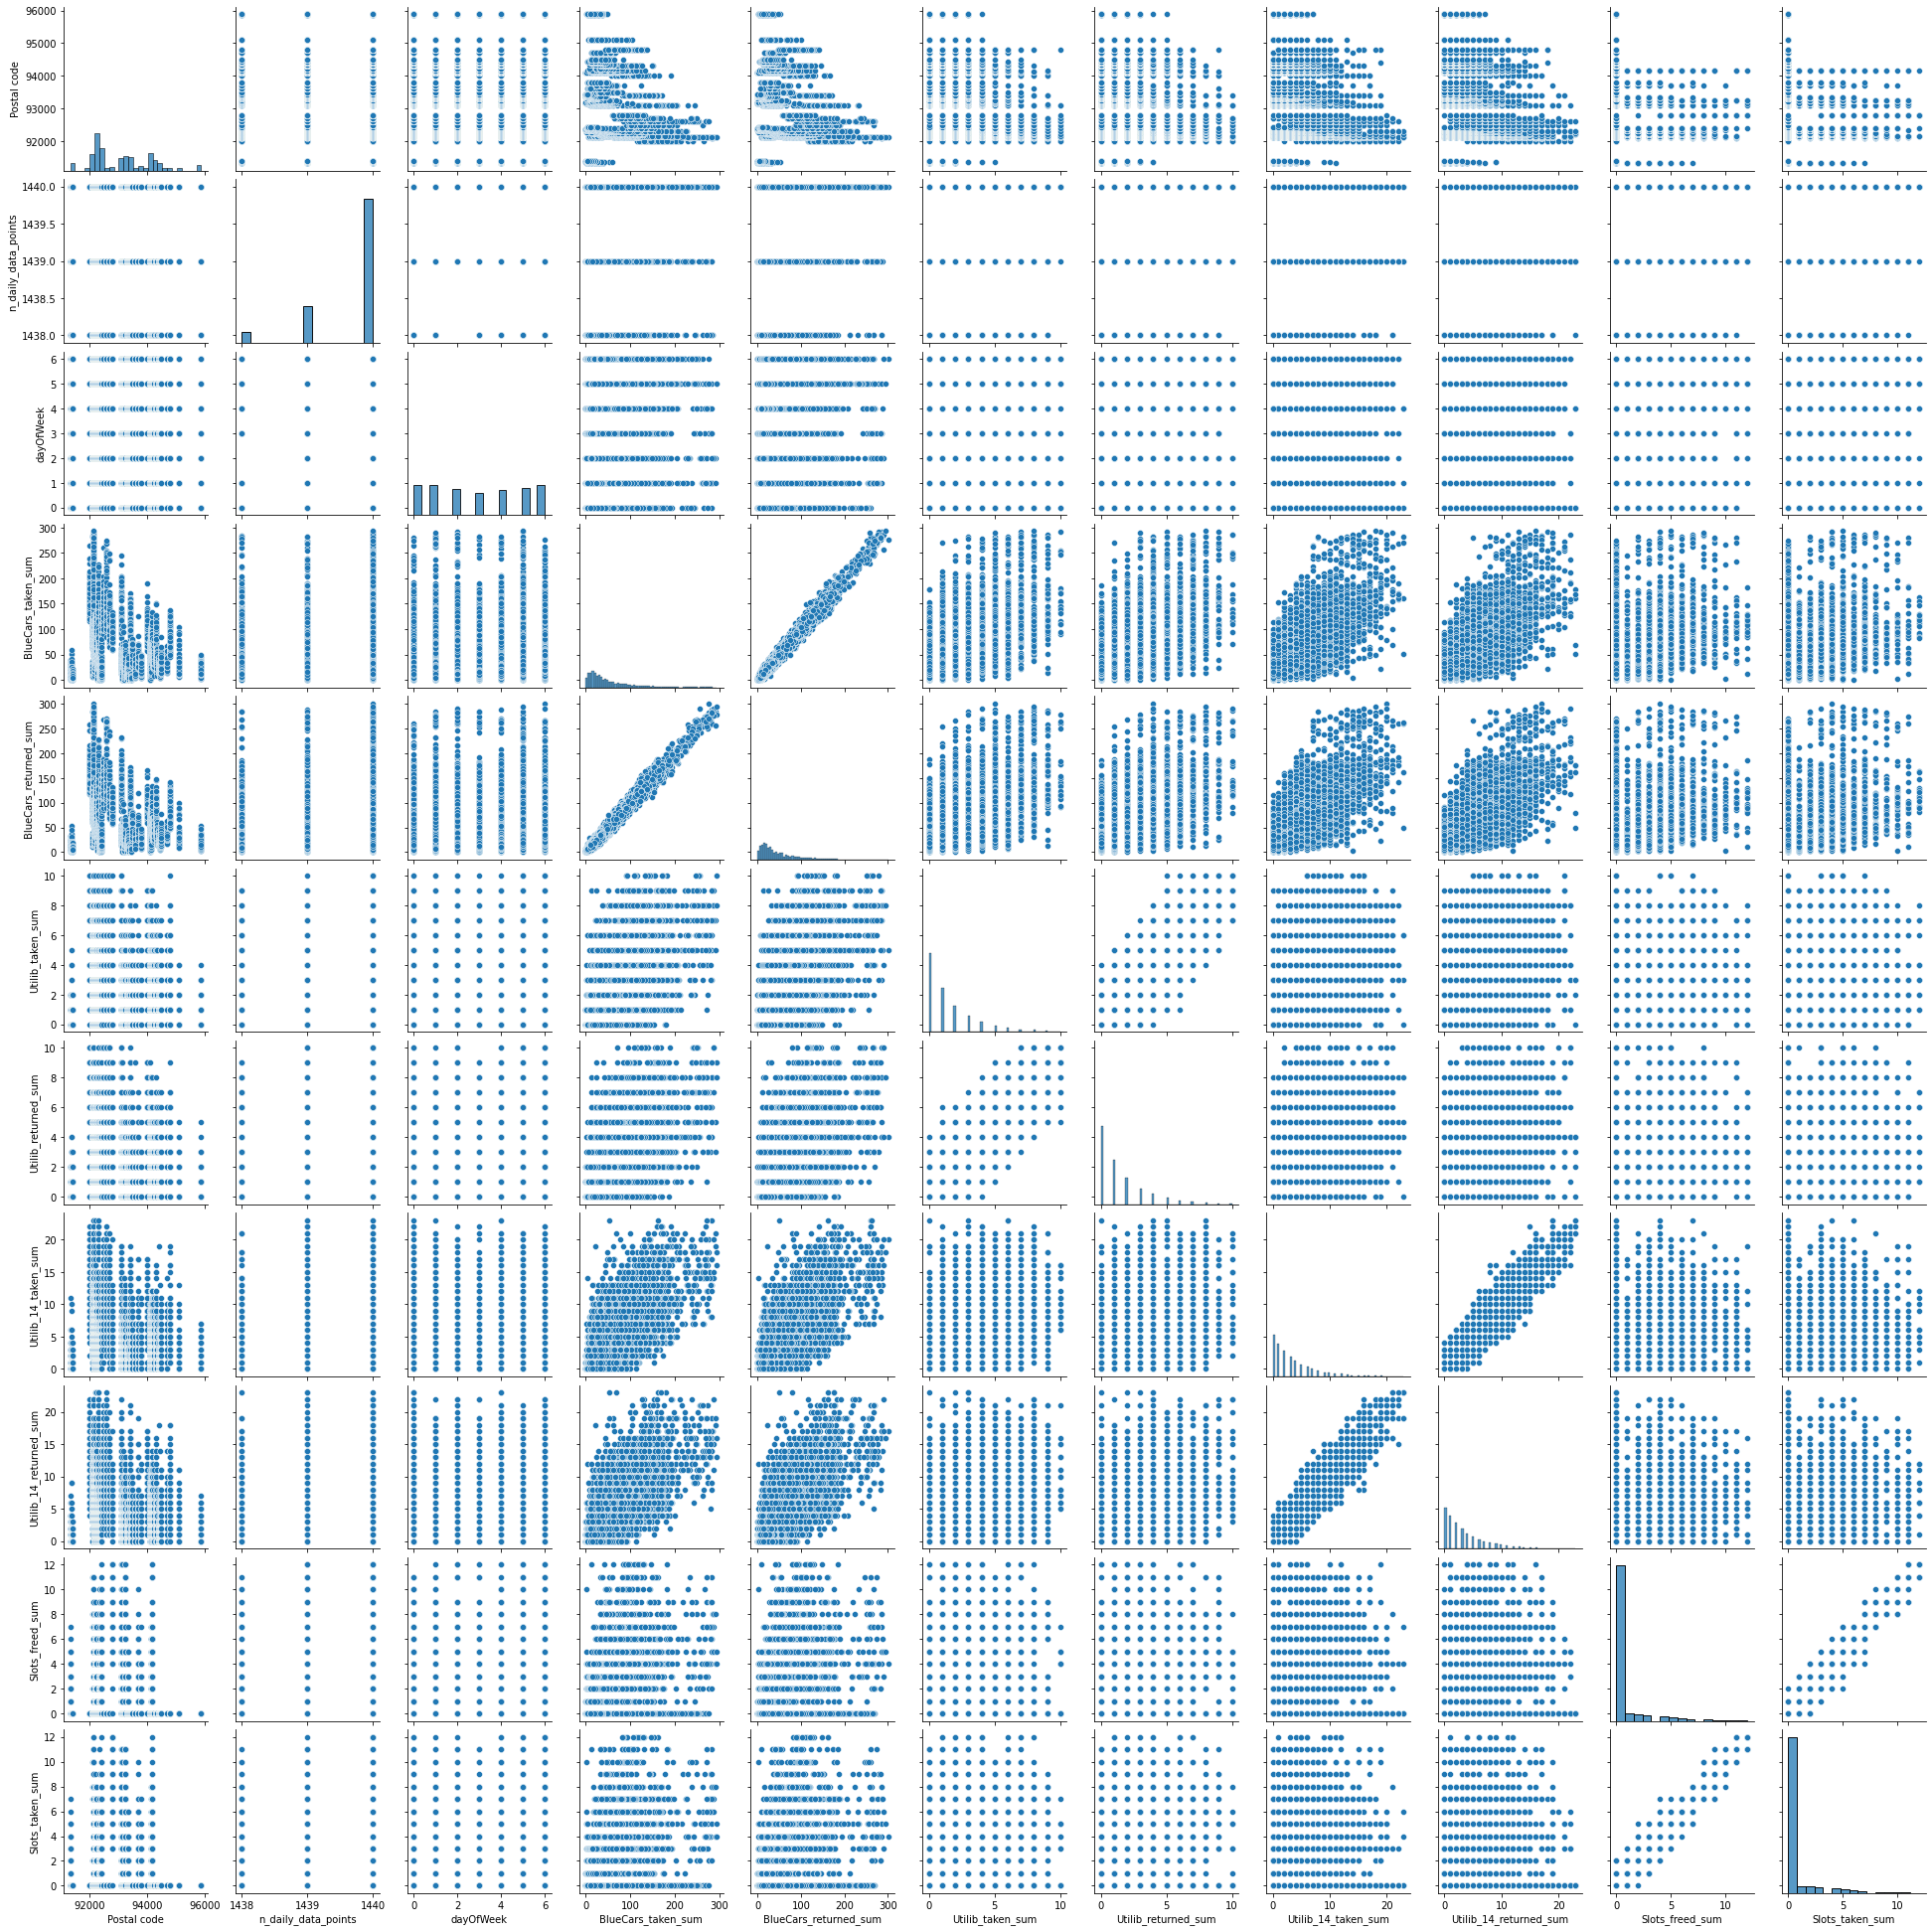

In [50]:
sns.pairplot(dfs)
plt.show()

In [51]:
#correlation
dfs.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.001195,0.004671,-0.206847,-0.208021,-0.132142,-0.129783,-0.150472,-0.149341,-0.121932,-0.120596
n_daily_data_points,0.001195,1.000000,0.098400,0.003433,0.005715,0.010958,0.010642,0.011844,0.016537,-0.001043,-0.002158
dayOfWeek,0.004671,0.098400,1.000000,0.110733,0.103159,0.075870,0.077932,0.086363,0.083896,0.020186,0.014675
BlueCars_taken_sum,-0.206847,0.003433,0.110733,1.000000,0.992041,0.626960,0.625355,0.751659,0.747126,0.312955,0.310257
BlueCars_returned_sum,-0.208021,0.005715,0.103159,0.992041,1.000000,0.629297,0.627041,0.754341,0.750467,0.309676,0.309799
Utilib_taken_sum,-0.132142,0.010958,0.075870,0.626960,0.629297,1.000000,0.896131,0.505760,0.497382,0.204125,0.203032
Utilib_returned_sum,-0.129783,0.010642,0.077932,0.625355,0.627041,0.896131,1.000000,0.508498,0.500723,0.202881,0.202152
Utilib_14_taken_sum,-0.150472,0.011844,0.086363,0.751659,0.754341,0.505760,0.508498,1.000000,0.948078,0.220987,0.219591
Utilib_14_returned_sum,-0.149341,0.016537,0.083896,0.747126,0.750467,0.497382,0.500723,0.948078,1.000000,0.216981,0.218259
Slots_freed_sum,-0.121932,-0.001043,0.020186,0.312955,0.309676,0.204125,0.202881,0.220987,0.216981,1.000000,0.985033


observations

theres a linear corellation between bluecars taken and bluecars returned.

In [52]:
#calculating corealtion 
pearson_coeff =dfs["Slots_taken_sum"].corr(dfs["Slots_freed_sum"], method="pearson") 
print(pearson_coeff)
# there is a linear realtionship betweeem the variables


0.9850332449099026


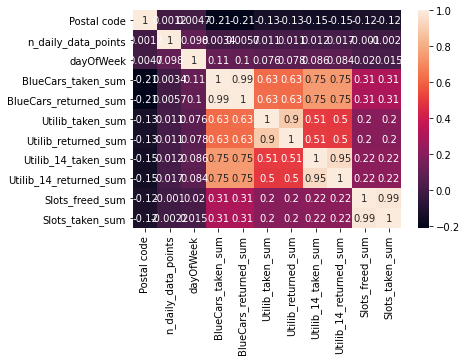

In [53]:
sns.heatmap(dfs.corr(),annot=True)
plt.show()

categorical_numerical analysis

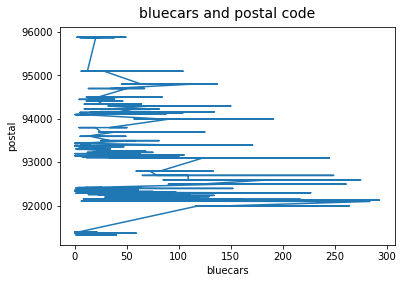

In [54]:
#day type vs Bluecars taken
bluecars  = dfs['BlueCars_taken_sum']
postal=dfs['Postal code']

# Plotting our line graph
plt.plot(bluecars, postal)

# Giving a title to our line graph
plt.title("bluecars and postal code", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('postal')

# Labelling the x-axis
plt.xlabel('bluecars')
plt.show()

#HYPOTHESIS TESTING

#hypothesis testing is comparisons of means of groups and classes

#performing statistical test


1st claim

does the  data of blue cars returned in postal code 91330 have a gaussian / normal distribution?

Shapiro-Wilk Test


Tests whether a data sample has a normal distribution distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [56]:
post91330 = dfs.loc[dfs['Postal code'] ==91330]
post91330

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,91330,6/14/2018,1439,3,weekday,13,14,0,0,0,0,0,0
4050,91330,6/15/2018,1440,4,weekday,12,5,0,0,0,2,0,0
4051,91330,6/16/2018,1440,5,weekend,14,14,0,0,3,1,2,2
4052,91330,6/17/2018,1440,6,weekend,39,33,0,0,0,0,5,3


In [60]:
# Example  Normality Test using p value
from scipy.stats import shapiro
data = post91330['BlueCars_returned_sum']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('the sammple has a gaussian distribution')
else:
	print('the sample does not have a gaussian distribution')

stat=0.898, p=0.000
the sample does not have a gaussian distribution


observations

in the above postal adress 91330 i will reject the null hypothesis which states that the sample has a gaussian distributon

**D’Agostino’s K^2 Test**


Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.



In [61]:
#the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = dfs['BlueCars_returned_sum']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3434.808, p=0.000
Probably not Gaussian


observation
in the above hypothesis test i am going to reject the null hypothesis because the above data does not have a gaussian distribution.

2nd claim

does bluecars taken and blue cars 9returned have a linear realtionship?

**Correlation Tests**


This section lists statistical tests that you can use to check if two samples are related.

Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples.
Python Code



In [62]:
from scipy.stats import pearsonr
data1 = dfs['BlueCars_taken_sum']
data2 = dfs['BlueCars_returned_sum']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.992, p=0.000
Probably dependent


from the above hypothesis test it proves that the blue cars taken and blue cars returned have a linear distribution as seen earlier in bivariate analysis

In [64]:
#to check whether the means of the samples of different postal codes are different.ie 91330 and 91370
post91370 = dfs.loc[dfs['Postal code'] ==91370]
post91370

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
4055,91370,1/1/2018,1440,0,weekday,18,6,0,1,1,0,0,0
4056,91370,1/2/2018,1438,1,weekday,4,7,1,0,1,1,0,0
4057,91370,1/3/2018,1439,2,weekday,12,19,0,1,0,1,0,0
4059,91370,1/5/2018,1440,4,weekday,6,9,1,0,1,1,0,0
4061,91370,1/7/2018,1440,6,weekend,19,12,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,91370,6/14/2018,1439,3,weekday,6,12,0,0,1,1,0,0
4206,91370,6/15/2018,1440,4,weekday,13,11,0,0,0,1,0,0
4207,91370,6/16/2018,1440,5,weekend,16,17,0,0,1,0,0,0
4208,91370,6/17/2018,1440,6,weekend,26,17,1,1,2,2,0,0


**STUDENTS T TEST**

Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.


3rd claim

do the means of blue cars taken in postal code 91330 and 91370 the same?

In [65]:

from scipy.stats import ttest_ind
data1 = post91330['BlueCars_taken_sum']
data2 = post91370['BlueCars_taken_sum']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.975, p=0.049
Probably the same distribution


observation

in this case i will reject the null hypothesis which states that the samples are equal.

5. Z TEST

one sample Z_test

Assumptions:

1. data points are independent

2. data is normally distributed.

my sample size is greater than 30 other wise i will use a t.test.

In [66]:
#lets check for the mean of sum of returned cars
dfs['BlueCars_returned_sum'].mean()
#i will use the above mean to to accept and reject the null hypothesis.

49.22232444035572

4th claim

is the mean of bluecars returned 49?

Ho:m=49 ie mean is equal to 49 from the above calculation.


H1:m#49 ie mean is not equal to 49

In [67]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(dfs['BlueCars_returned_sum'], x2=None, value=49)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.634269323838423
accept null hypothesis


observations

from the above statistical test i am going to accept the null hypothesis which states that mean is equal to 49.